# Explore Repost Data

- Notebook for exploring repost power load anf PV data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import matplotlib

In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
df_load = pd.read_csv('LOAD_PyPSA_Model.csv')
df_pv = pd.read_csv('PV_PyPSA_Model.csv')
# Create datetuime index, remove date and time column
df_load.set_index(pd.to_datetime(df_load['Date'] + ' ' + df_load['time']), inplace=True)
df_pv.set_index(pd.to_datetime(df_pv['Date'] + ' ' + df_pv['time']), inplace=True)
df_load.drop(['Date', 'time'], inplace=True, axis=1)
df_pv.drop(['Date', 'time'], inplace=True, axis=1)

In [5]:
load = df_load.loc['2019-02-06']['Customer508']
pv = df_pv.loc['2019-02-06']['Customer508']

In [6]:
load

2019-02-06 00:00:00    0.613966
2019-02-06 00:30:00    0.481479
2019-02-06 01:00:00    0.433910
2019-02-06 01:30:00    0.453561
2019-02-06 02:00:00    0.443960
2019-02-06 02:30:00    0.431768
2019-02-06 03:00:00    0.465264
2019-02-06 03:30:00    0.435651
2019-02-06 04:00:00    0.417955
2019-02-06 04:30:00    0.408627
2019-02-06 05:00:00    0.472984
2019-02-06 05:30:00    0.518064
2019-02-06 06:00:00    0.413256
2019-02-06 06:30:00    1.005735
2019-02-06 07:00:00    0.757233
2019-02-06 07:30:00    0.780607
2019-02-06 08:00:00    0.433493
2019-02-06 08:30:00    0.394407
2019-02-06 09:00:00    0.617256
2019-02-06 09:30:00    0.555996
2019-02-06 10:00:00    0.850077
2019-02-06 10:30:00    0.709256
2019-02-06 11:00:00    0.458866
2019-02-06 11:30:00    0.651375
2019-02-06 12:00:00    0.454664
2019-02-06 12:30:00    0.476340
2019-02-06 13:00:00    0.454503
2019-02-06 13:30:00    0.788726
2019-02-06 14:00:00    1.199520
2019-02-06 14:30:00    0.507910
2019-02-06 15:00:00    0.574204
2019-02-


## Plotting Single Customer Interval Data

In [7]:
os.getcwd()

'/home/brendan/PhD/Python Scripts/ThesisGit/Time Series Plots'

In [8]:
sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
matplotlib.rcParams['font.family'] = 'Abyssinica SIL'

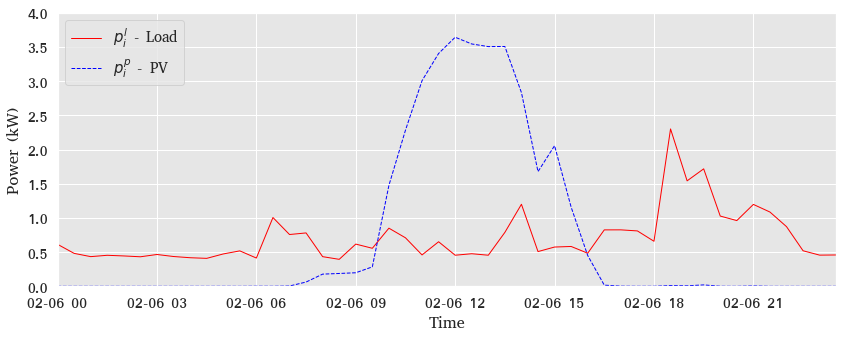

In [9]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time')
ax1.set_ylabel('Power (kW)')
ax1.set_ylim(-0,4)
ax1.plot(load.index, load, label='$p_i^l$ - Load', lw=1, color='red')
ax1.plot(load.index,pv, label='$p_i^p$ - PV', lw=1, color='blue', linestyle='--')
ax1.legend(loc="upper left")
ax1.set_xlim([load.index[0], load.index[-1:][0]])

fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(12)

plt.savefig('reposit_interval.pdf', bbox_inches='tight')

plt.show()